MachineLearning - Week 4 Assignment

In [94]:
#Importing input
import numpy as np
import pandas as pd
df=pd.read_csv("Week4 Dataset2.csv", skiprows=[0], names=["X1","X2","y"])
print(df.head())
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
y=df.iloc[:,2]

#Knowing the input data
print(np.shape(df))
print(min(X1), max(X1))
print(min(X2), max(X2))
print(min(y), max(y))

     X1    X2  y
0  0.34  0.71 -1
1 -0.43  0.86 -1
2 -0.37 -0.75  1
3 -0.91  0.93 -1
4  0.72  0.68 -1
(1036, 3)
-1.0 1.0
-1.0 1.0
-1 1


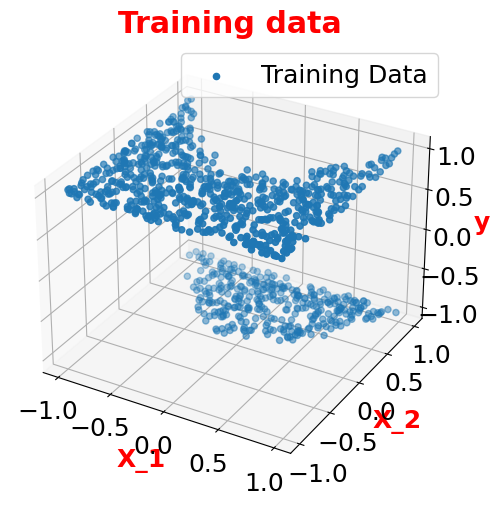

In [95]:
#Visualizing the input datsets
# %matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1,X2,y, label = "Training Data")
ax.set_xlabel("X_1", fontweight ='bold').set_color('red')
ax.set_ylabel("X_2", fontweight ='bold').set_color('red')
ax.set_zlabel("y", fontweight ='bold').set_color('red')
ax.legend()
# ax.view_init(0, 90)
ax.set_title("Training data", fontweight ='bold').set_color('red')

c:\Users\sarathkumar\anaconda3\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


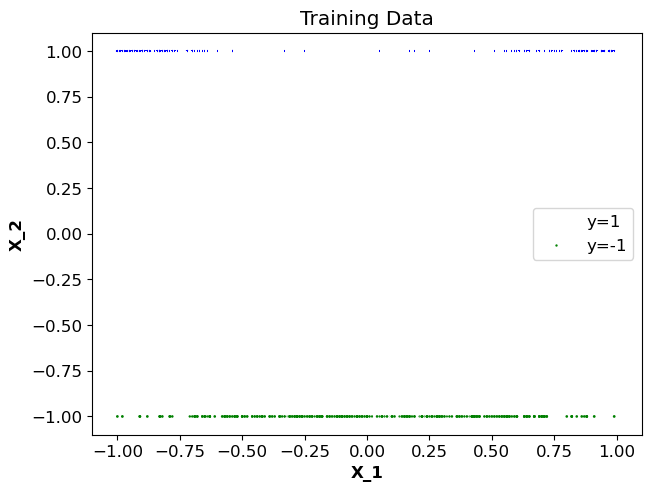

In [96]:
import matplotlib.pyplot as plt
plt.figure()
plt.rc('font', size =12)
plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(X1[y==1],y[y==1],X2[y==1], c='b',marker='+', label='y=1')
plt.scatter(X1[y==-1],y[y==-1], X2[y==-1], c='g',marker='o', label='y=-1') 
# plt.scatter(X1[y==-1],X2[y==-1],c='b',marker='o', label=r'$y_t=-1$')
plt.ylabel('X_2', fontweight ='bold')
plt.xlabel('X_1', fontweight ='bold')
plt.legend()
plt.title("Training Data")
plt.show()

In [97]:
def splitNaddPoly(X, y, n=5, gridRange=2):
    ####Splitting the model into train, and test
    from sklearn.model_selection import train_test_split
    Xtrain, Xtest, ytrain, ytest = train_test_split(X,y) # --> Return ytrain, ytest

    ####Adding extra polynomial features equal to all combinations of powers of the two features up to power n
    from sklearn.preprocessing import PolynomialFeatures
    Xtrain_poly = PolynomialFeatures(n).fit_transform(Xtrain) # --> Return Xtrain_poly
    Xtest_poly = PolynomialFeatures(n).fit_transform(Xtest) # --> Return Xtest_poly
    X_poly = PolynomialFeatures(n).fit_transform(X)

    ####Grid of feature values, to use for predictions
    # Xt=[]
    # grid=np.linspace(-gridRange,gridRange)
    # for i in grid:
    #     for j in grid:
    #         Xt.append([i,j])
    # Xt = np.array(Xt) #### Return Xt
    # Xtest = PolynomialFeatures(n).fit_transform(Xt) #### Return Xtest
    
    return Xtrain_poly, Xtest_poly, ytrain, ytest

In [98]:
def logisticRegression(Xtrain_poly, Xtest_poly, ytrain, ytest, c):
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(penalty='l2', C= c,max_iter=10000).fit(Xtrain_poly, ytrain)
    prediction = model.predict(Xtest_poly)
    return model, prediction

In [99]:
def modelResults(testY,model, prediction,c):
    print("C = ", c)
    print(f"Model Intercept = {model.intercept_}")
    print(f"Model Coefficient = {model.coef_.tolist()}")
    from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
    
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    # print(scores)
    print("Accuracy (for 5 fold cross validation): %0.2f (+/− %0.2f)" % (scores.mean(), scores.std()))

    print("Confusion matrix:")
    print(confusion_matrix(testY,prediction))
    print("Classification report:")
    print(classification_report(testY,prediction))

    # print("Mean square error =", mean_squared_error(testY,prediction))

    # Xt=[]
    # grid=np.linspace(-2,2)
    # for i in grid:
    #     for j in grid:
    #         Xt.append([i,j])
    # Xt = np.array(Xt)


    # %matplotlib widget
    # import matplotlib.pyplot as plt
    # from mpl_toolkits.mplot3d import Axes3D
    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    # ax.scatter(X1,X2,y, label = "Training Data")
    # ax.plot_trisurf(Xtest_poly[:,1], Xtest_poly[:,2], prediction)
    # ax.set_xlabel("X_1", fontweight ='bold').set_color('red')
    # ax.set_ylabel("X_2", fontweight ='bold').set_color('red')
    # ax.set_zlabel("y", fontweight ='bold').set_color('red')
    # ax.legend(fontsize = 'medium')
    # ax.set_title(f"Training data and Prediction curve with penality C = {c}", fontweight ='bold').set_color('red')
    # plt.show()

    # xmin, xmax = -3, 3
    # ymin, ymax = -3, 3
    # xd = np.array([xmin, xmax])

    # plt.figure()
    # plt.rc('font', size =12)
    # plt.rcParams['figure.constrained_layout.use'] = True
    # plt.scatter(X1, y, X2, c='b',marker='o') 
    # # plt.scatter(X1[y==-1],X2[y==-1],c='b',marker='o', label=r'$y_t=-1$')
    # ##_____
    # ##_____
    # # plt.plot(xd, yd, 'black', lw=2)
    # plt.xlim(xmin, xmax)
    # plt.ylim(ymin, ymax)
    # plt.ylabel('X_2')
    # plt.xlabel('X_1')
    # plt.legend()
    # plt.title("Predicted target over training data, LR model with original features", loc='center')
    # plt.show()


In [100]:
def dummyRegressor(Xtrain_poly, Xtest_poly, ytrain, ytest):
    from sklearn.dummy import DummyRegressor
    dummy = DummyRegressor(strategy='mean').fit(Xtrain_poly, ytrain)
    ydummy = dummy.predict(Xtest_poly)
    from sklearn.metrics import mean_squared_error
    print('Mean square error (Dummy) = %f'%(mean_squared_error(ytest,ydummy)))

In [101]:
def dummyClassifier(Xtrain_poly, Xtest_poly, ytrain, ytest):   
   from sklearn.dummy import DummyClassifier
   dummy = DummyClassifier(strategy='most_frequent').fit(Xtrain_poly, ytrain)
   ydummy = dummy.predict(Xtest_poly)

   from sklearn.metrics import confusion_matrix, classification_report
   print("Confusion matrix:")
   print(confusion_matrix(ytest, ydummy))
   print("Classification report:")
   print(classification_report(ytest, ydummy))

In [102]:
def errorBar(Xtrain_poly, Xtest_poly, ytrain, ytest):
    mean_error=[]
    std_error=[]
    f1 = []
    Ci_range = [0.01, 0.1, 1, 5, 10, 25, 50, 100, 1000]
    for Ci in Ci_range:
        model, prediction = logisticRegression(Xtrain_poly, Xtest_poly, ytrain, ytest, Ci)
        from sklearn.model_selection import cross_val_score
        scores = cross_val_score(model, Xtrain_poly, ytrain, cv=5, scoring='f1')
        # f1.append(max(scores))
        mean_error.append(np.array(scores).mean())
        std_error.append(np.array(scores).std())
    
    print(Ci_range)
    print(mean_error)

    import matplotlib.pyplot as plt
    plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
    plt.errorbar(Ci_range,mean_error,yerr=std_error,linewidth=3)

    plt.xlabel('Weight(C)'); plt.ylabel('F1 Score')
    # plt.xlim((0,1))
    plt.title("F1 Score vs C (Poly=10)")
    plt.show()
    # return f1

In [103]:
def kNN_CV(X,y):
    mean_error=[]
    std_error=[]
    f1 = []
    K_range = [2,3,5,10,30,50,100, 130, 150, 200]
    for k in K_range:
        from sklearn.model_selection import train_test_split
        Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)
        from sklearn.neighbors import KNeighborsClassifier
        model = KNeighborsClassifier(n_neighbors=k,weights='distance').fit(Xtrain, ytrain)
        from sklearn.model_selection import cross_val_score
        scores = cross_val_score(model, Xtrain, ytrain, cv=5, scoring='f1')
        f1.append(max(scores))
        mean_error.append(np.array(scores).mean())
        std_error.append(np.array(scores).std())
    print(K_range)
    print(mean_error)
    import matplotlib.pyplot as plt
    plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
    plt.errorbar(K_range,mean_error,yerr=std_error,linewidth=3)
    plt.xlabel('k'); plt.ylabel('F1 Score')
    # plt.xlim((0,1))
    plt.title("F1 Score vs k(gaussian weight)")
    plt.show()

    # return f1


In [104]:
def kNN(X, y, k):
    from sklearn.model_selection import train_test_split
    Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)
    Xtrain, Xtest, ytrain, ytest
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors=k,weights='distance').fit(Xtrain, ytrain)
    prediction = model.predict(Xtest)
    return model, prediction, Xtest, ytest

In [105]:
def kNN_Metrics(ytest,prediction):
    from sklearn.metrics import confusion_matrix, classification_report
    print("Confusion matrix (kNN):")
    print(confusion_matrix(ytest,prediction))
    print("Classification report (kNN):")
    print(classification_report(ytest,prediction))

In [106]:
def rocCurve(model,Xtest_poly, ytest):
    # model, prediction = logisticRegression(Xtrain_poly, Xtest_poly, ytrain, ytest, 10)
    from sklearn.metrics import roc_curve,auc
    fpr, tpr, _ = roc_curve(ytest,model.decision_function(Xtest_poly))
    import matplotlib.pyplot as plt
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, roc_auc

In [107]:
Xtrain_poly, Xtest_poly, ytrain, ytest = splitNaddPoly(X, y, 2)

[0.01, 0.1, 1, 5, 10, 25, 50, 100, 1000]
[0.967086588658866, 0.9807794779477946, 0.9937818181818182, 0.9957760576057606, 0.9958844284428441, 0.9957040504050404, 0.9956676867686769, 0.9957036903690369, 0.9957040504050404]


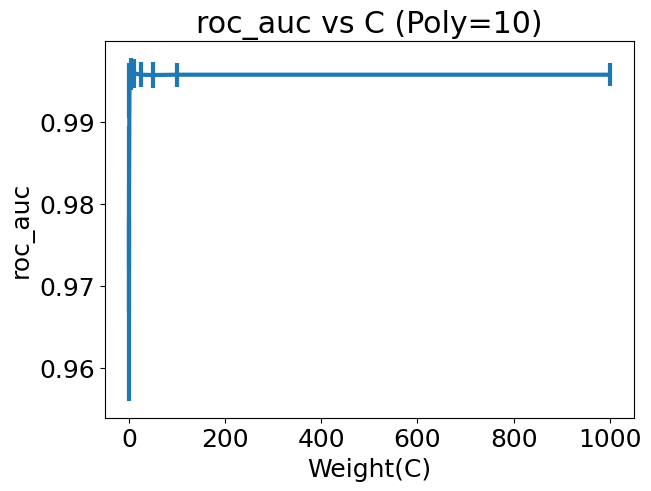

In [108]:
mean_error=[]
std_error=[]
f1 = []
Ci_range = [0.01, 0.1, 1, 5, 10, 25, 50, 100, 1000]
for Ci in Ci_range:
    model, prediction = logisticRegression(Xtrain_poly, Xtest_poly, ytrain, ytest, Ci)
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(model, Xtrain_poly, ytrain, cv=5, scoring='roc_auc')
    # f1.append(max(scores))
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())

print(Ci_range)
print(mean_error)

import matplotlib.pyplot as plt
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.errorbar(Ci_range,mean_error,yerr=std_error,linewidth=3)

plt.xlabel('Weight(C)'); plt.ylabel('roc_auc')
# plt.xlim((0,1))
plt.title("roc_auc vs C (Poly=10)")
plt.show()

[0.01, 0.1, 1, 5, 10, 25, 50, 100, 1000]
[0.8655316071243615, 0.9339515077812408, 0.964193777973129, 0.9700779696085924, 0.9710921683915539, 0.9701074468038172, 0.9701074468038172, 0.9701074468038172, 0.9701074468038172]


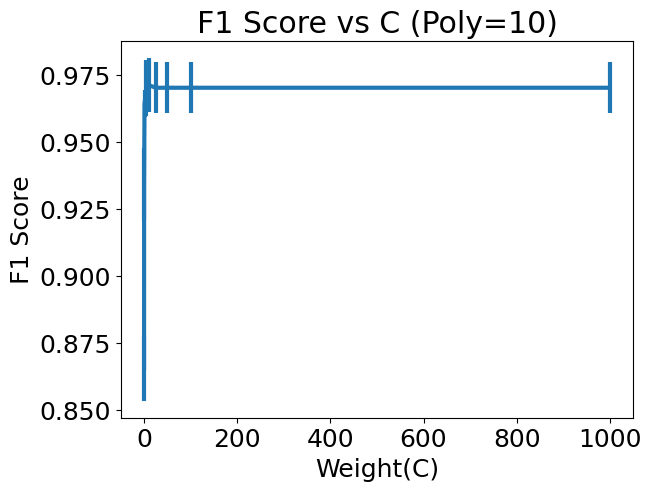

None


In [109]:
# to get polynomial and penalty weight value
f1_values = errorBar(Xtrain_poly, Xtest_poly, ytrain, ytest)
print(f1_values)

In [110]:
model1, prediction1 = logisticRegression(Xtrain_poly, Xtest_poly, ytrain, ytest, 100)
modelResults(ytest, model1, prediction1, 100)

C =  100
Model Intercept = [-0.33828209]
Model Coefficient = [[-0.0027641850480496642, 0.8191794139026326, -20.22734344106789, 20.608967162695194, -0.7396223730230739, 0.5237259503281341]]
Accuracy (for 5 fold cross validation): -0.52 (+/− 0.12)
Confusion matrix:
[[ 68   1]
 [  6 184]]
Classification report:
              precision    recall  f1-score   support

          -1       0.92      0.99      0.95        69
           1       0.99      0.97      0.98       190

    accuracy                           0.97       259
   macro avg       0.96      0.98      0.97       259
weighted avg       0.97      0.97      0.97       259



In [111]:
dummyClassifier(Xtrain_poly, Xtest_poly, ytrain, ytest)

Confusion matrix:
[[  0  69]
 [  0 190]]
Classification report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        69
           1       0.73      1.00      0.85       190

    accuracy                           0.73       259
   macro avg       0.37      0.50      0.42       259
weighted avg       0.54      0.73      0.62       259



c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


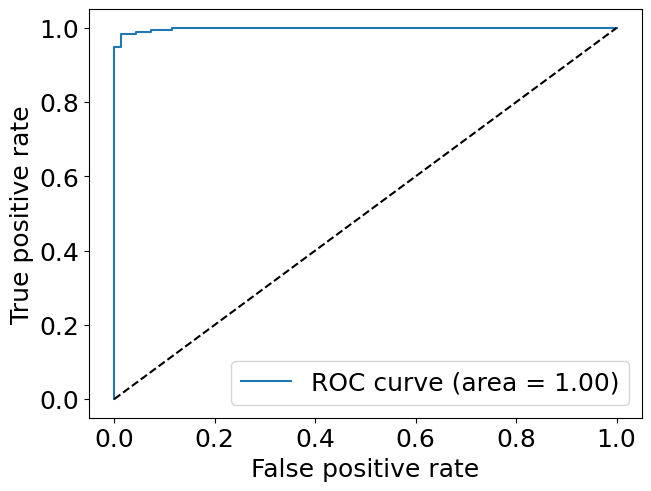

In [112]:
Lfpr, Ltpr, Lroc_auc = rocCurve(model1,Xtest_poly, ytest)

[2, 3, 5, 10, 30, 50, 100, 130, 150, 200]
[0.9640355668821357, 0.972239270417699, 0.9745113087416059, 0.9682239518865522, 0.9748498634751913, 0.9646419770480188, 0.9644915115395664, 0.9679603829179836, 0.957154325975422, 0.963016691059274]


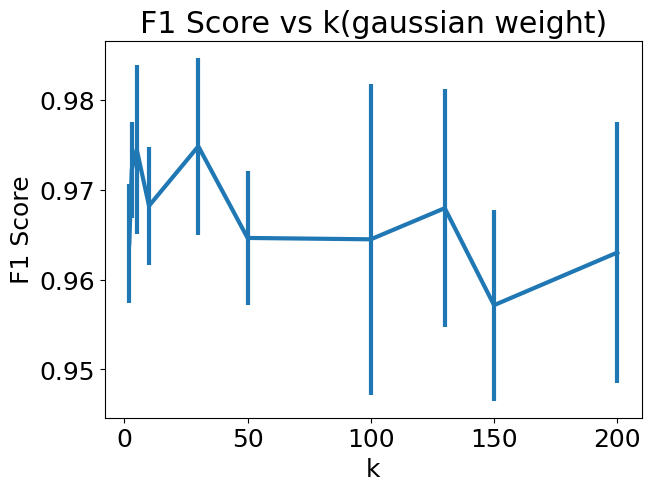

In [113]:
kNN_CV(X,y)

In [114]:
model, prediction, Xtest, ytest = kNN(X,y,10)
kNN_Metrics(ytest,prediction)

Confusion matrix (kNN):
[[ 72   4]
 [  5 178]]
Classification report (kNN):
              precision    recall  f1-score   support

          -1       0.94      0.95      0.94        76
           1       0.98      0.97      0.98       183

    accuracy                           0.97       259
   macro avg       0.96      0.96      0.96       259
weighted avg       0.97      0.97      0.97       259



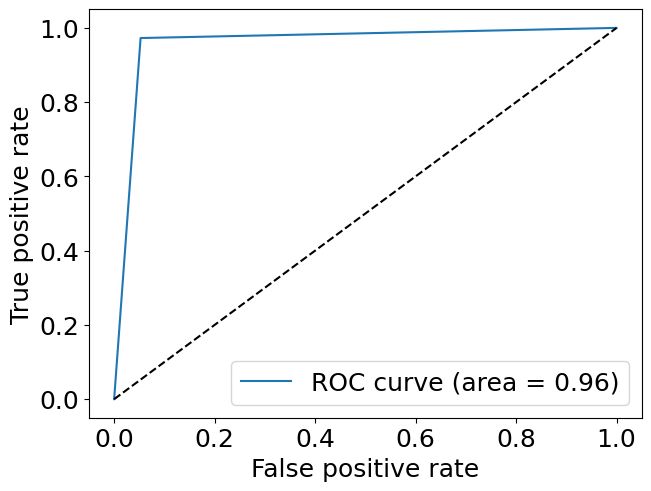

In [115]:
def rocCurve(model,ytest,prediction):
    from sklearn.metrics import roc_curve,auc
    fpr, tpr, _ = roc_curve(ytest,prediction,)
    roc_auc = auc(fpr,tpr)
    import matplotlib.pyplot as plt
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, roc_auc

kfpr, ktpr, kauc = rocCurve(model,ytest,prediction)

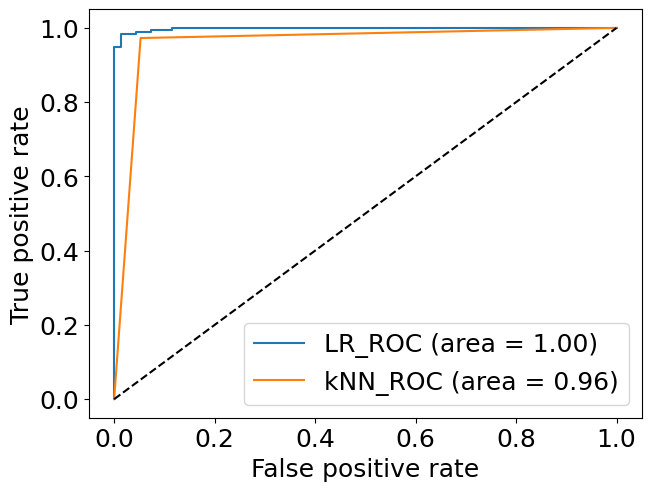

In [116]:
def combinedROC(Lfpr, Ltpr, Lroc_auc, kfpr, ktpr, kauc):  
    import matplotlib.pyplot as plt
    plt.plot(Lfpr, Ltpr,label='LR_ROC (area = %0.2f)' % Lroc_auc)
    plt.plot(kfpr, ktpr,label='kNN_ROC (area = %0.2f)' % kauc)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.legend(loc="lower right")
    plt.show()


combinedROC(Lfpr, Ltpr, Lroc_auc, kfpr, ktpr, kauc)

[2, 3, 5, 10, 30, 50, 100, 130, 150, 200]
[0.9678183940242764, 0.977901300693771, 0.9830727762803235, 0.9956952336568554, 0.9948726537780047, 0.9909936757240108, 0.994284502727206, 0.9882238993710691, 0.9931352914997775, 0.991899946561434]


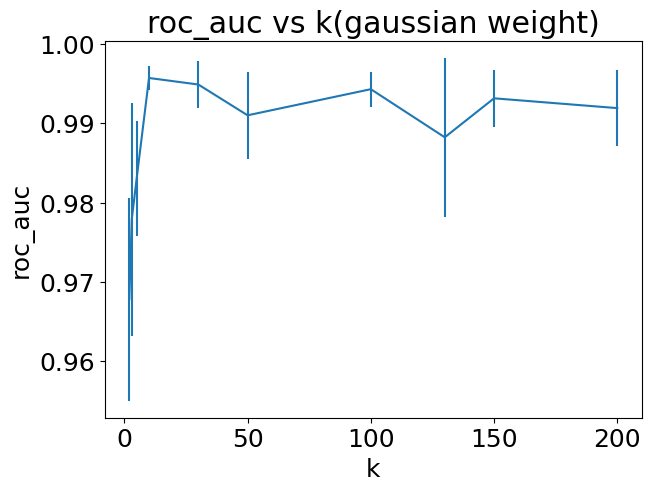

In [117]:
mean_error=[]
std_error=[]
f1 = []
K_range = [2,3,5,10,30,50,100, 130, 150, 200]
for k in K_range:
    from sklearn.model_selection import train_test_split
    Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors=k,weights='distance').fit(Xtrain, ytrain)
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(model, Xtrain, ytrain, cv=5, scoring='roc_auc')
    f1.append(max(scores))
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
print(K_range)
print(mean_error)
import matplotlib.pyplot as plt
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.errorbar(K_range,mean_error,yerr=std_error)
plt.xlabel('k'); plt.ylabel('roc_auc')
# plt.xlim((0,1))
plt.title("roc_auc vs k(gaussian weight)")
plt.show()